<a href="https://colab.research.google.com/github/mckore/Gender-Gap-w.-Incarceration-/blob/master/AMZ_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai import *
from fastai.text import *
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NLP_AMZ.csv', engine = 'python')
path = Path('/content/drive/My Drive/Colab Notebooks/')

In [ ]:
data.head

<bound method NDFrame.head of       Annontation                                             Review
0               0  I've only used this product 3 times so far. Th...
1               0            very poor battery life, but it's quiet!
2               0  Pros:Quiet, easy to use mower that can both mu...
3               0  I'm in love with this machine! Quiet, cuts cle...
4               3  I bought this in Spring 2015 and I've used it ...
...           ...                                                ...
7913            0  It works great. The two batteries do the trick...
7914            0       Very good mower with excellrnt battery life.
7915            0  The mower works as well as any gas mower, but ...
7916            0  I used it one time the battery life sucks..!! ...
7917            0  light weight and quiet. works with my existing...

[7918 rows x 2 columns]>

In [ ]:
data.dropna(inplace=True)
data.shape

(7917, 2)

In [ ]:
type(data)
data.columns
data['Review'].head()

0    I've only used this product 3 times so far. Th...
1              very poor battery life, but it's quiet!
2    Pros:Quiet, easy to use mower that can both mu...
3    I'm in love with this machine! Quiet, cuts cle...
4    I bought this in Spring 2015 and I've used it ...
Name: Review, dtype: object

In [ ]:
train, val = train_test_split(data, random_state=123)

In [ ]:
data_lm = TextLMDataBunch.from_df(path, train, val)

In [ ]:
data_lm.save()

In [ ]:
data = TextLMDataBunch.from_df(path, train, val)
data.show_batch()

In [ ]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.']

In [ ]:
data.train_ds[0][0]
data.train_ds[0][0].data[:10]

array([   2,   11,  126,   19,   18,  109,   11,   29, 4578,   75])

In [ ]:
bs=48

In [ ]:
data_lm2 = load_data(path, 'data_save.pkl', bs=bs)

In [ ]:
data_lm2.show_batch()

idx,text
0,hiring the pro 's i just became one with this wonderful toy ! xxbos i have had this mower for 2 months now and it has been great . xxmaj this is my second electric mower and is quite an improvement . xxmaj it has had no trouble with cutting the grass in my yard ( 1 / 4 acre ) . i had to mow the lawn between rains
1,"xxmaj it says it comes with two batteries . i expected that to mean one was a spare , but both are needed . xxmaj it can run on one , but it wo n't last nearly long enough to do the job . xxmaj short battery life . xxmaj with both batteries fully charged , i 'm barely able to finish my fairly small yard . xxmaj if i"
2,"minutes later a live person came on line to ask me a number of useless questions and finally tell me that i have to contact xxmaj amazon because i bought it from them . i did contact xxmaj amazon , and returned the whole thing , waiting for it be pick up by xxup ups . xxbos i really like the trimmer and the batteries last long enough to let"
3,"in my xxunk beds . xxmaj solved a big problem for me with the ground covers , like xxunk xxunk , xxunk the hostas . xxmaj now the ground covers and hostas can live together in total harmony . i would have given the product 5 stars if it were not for the instructions . xxmaj barely xxunk print size , bad pictures , and the special features of this"
4,"decker - xxup xxunk - xxmaj lithium - xxmaj charger / dp / xxup xxunk / ref = xxunk = xxunk = xxunk = xxunk = xxunk = xxunk one star miss is for the crappy charger , uneven finish , and the need for an additional battery . xxmaj but all in all , it 's all we need . xxbos it makes mowing so much easier for me"


In [ ]:
learn = language_model_learner(data_lm2, arch=AWD_LSTM, pretrained = True, drop_mult=0.7)

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


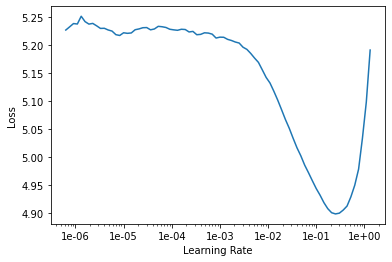

In [ ]:
learn.recorder.plot(skip_end=10)

In [ ]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8))

epoch,train_loss,valid_loss,accuracy,time
0,3.859790,3.596859,0.288355,20:03


In [ ]:
learn.save('fit_head')

In [ ]:
learn.load('fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (5937 items)
x: LMTextList
xxbos i bought this mower because i was disgusted at paying a professional $ 150 to do my small yard . xxmaj well , i never mowed in my life and being a city girl in xxmaj new xxmaj jersey i do n't know jack about doing this but i read others reviews and went in and my yard looks great like a professional mowed it . xxmaj so screw hiring the pro 's i just became one with this wonderful toy !,xxbos i have had this mower for 2 months now and it has been great . xxmaj this is my second electric mower and is quite an improvement . xxmaj it has had no trouble with cutting the grass in my yard ( 1 / 4 acre ) . i had to mow the lawn between rains and it still did a good job despite some grass buildup in the mulching mode . xxmaj the battery recharges in less than half an hour , so even if i have not needed to , it is great to know that if i completely deplete the battery i can be back out in less than half an h

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(10, 1e-2, moms=(0.8))

epoch,train_loss,valid_loss,accuracy,time
0,3.570230,3.455630,0.305530,31:11
1,3.489468,3.441001,0.308171,31:01
2,3.444572,3.450668,0.305676,31:46
3,3.313427,3.428931,0.310536,31:14
4,3.178015,3.394184,0.315352,30:29
5,2.962911,3.376781,0.319372,30:30
6,2.733386,3.375448,0.323030,30:19
7,2.442789,3.403912,0.324573,30:44
8,2.227167,3.438641,0.325254,31:18
9,2.112695,3.459796,0.324123,30:22


In [ ]:
learn.save('fine_tuned')

In [ ]:
learn.load('fine_tuned');

In [ ]:
TEXT = "This mower"
N_WORDS = 20
N_SENTENCES = 3

In [ ]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

This mower is light enough to maneuver , ease of use , and easy to operate . i mowed the entire yard
This mower is really small . i have a small ( ish ) yard , but it was too difficult to get
This mower works great for me . It is easy to assemble and i do n't have to pull and start


In [ ]:
learn.save_encoder('fine_tuned_enc')

In [ ]:
type(data)

fastai.text.data.TextLMDataBunch

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NLP_AMZ.csv', engine = 'python')
data.dropna(inplace=True)

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head()

,Annontation,Review
0,0,I've only used this product 3 times so far. Th...
1,0,"very poor battery life, but it's quiet!"
2,0,"Pros:Quiet, easy to use mower that can both mu..."
3,0,"I'm in love with this machine! Quiet, cuts cle..."
4,3,I bought this in Spring 2015 and I've used it ...


In [ ]:
data_temp = data[data['Annontation'] != 3]
data_temp.sample(10)

,Annontation,Review
6512,0,Highly recommend. Great product for your aver...
6545,0,"quiet, light weight, nice cutting results and ..."
6584,0,Works like a champ Very light and easy to use...
6445,0,"I have about 5000 sq ft, not sure how big that..."
4010,0,This mower has been great. I have used it abou...
6862,0,Works great better than I thought originally. ...
6243,0,I have had this mower for a year now and abso...
4136,0,"This product was a great price, but difficult ..."
4314,0,I assured the battery was fully charged and sh...
6173,0,2 years later and still holding up well. I wou...


In [ ]:
data_temp.shape

(4254, 2)

In [ ]:
# split data into training and validation set
df_train, df_val = train_test_split(data_temp, stratify = data_temp['Annontation'], test_size = 0.4, random_state = 123)

In [ ]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_train, valid_df = df_val, path = path)

lang_mod = language_model_learner(data_lm,  arch = AWD_LSTM, pretrained = True, drop_mult=0.7)

lang_mod.fit_one_cycle(4, max_lr= 5e-02)
lang_mod.freeze_to(-1)
lang_mod.fit_one_cycle(3, slice(1e-2/(2.6**4), 1e-2))
lang_mod.freeze_to(-2)
lang_mod.fit_one_cycle(3, slice(3e-3/(2.6**4), 1e-3))
lang_mod.unfreeze()
lang_mod.fit_one_cycle(3, slice(3e-3/(2.6**4), 1e-3))

lang_mod.save_encoder('MC_encoder')

epoch,train_loss,valid_loss,accuracy,time
0,4.140207,3.719869,0.272852,00:10
1,3.873925,3.688541,0.278767,00:10
2,3.603631,3.581672,0.290346,00:11
3,3.345300,3.540919,0.297182,00:11


epoch,train_loss,valid_loss,accuracy,time
0,3.251701,3.543442,0.296512,00:11
1,3.234377,3.524535,0.300112,00:11
2,3.154293,3.521230,0.300167,00:12


epoch,train_loss,valid_loss,accuracy,time
0,3.111946,3.502082,0.301869,00:13
1,3.085890,3.489872,0.303655,00:13
2,3.051795,3.486257,0.304743,00:12


epoch,train_loss,valid_loss,accuracy,time
0,3.036014,3.476424,0.305859,00:16
1,3.005306,3.464228,0.308092,00:16
2,2.964498,3.463974,0.308119,00:16


In [ ]:
data_lm.train_ds.vocab

In [ ]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_train,  valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=48)
data_clas.save('data_clas.pkl')

In [ ]:
data_clas.show_batch()

/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx_min = (t != self.pad_idx).nonzero().min()


text,target
"xxbos i really wanted to give this product a five star rating , but some issues emerged that dropped it to only three stars . xxmaj first , the battery i received is a dud . xxmaj after charging it fully it lasts less than 20 minutes under very light duty mowing conditions . i recharged it several times with the same poor results , and when i checked it",1
"xxbos xxmaj purchasing this xxmaj greenworks mower was a leap of faith for me . i have a very large ( xxunk sf ) and somewhat hilly lawn , and for the past 15 years i 've used a big , twin - bladed , 33 "" cutting path , xxunk hp , self - propelled , four - speed , semi - pro xxmaj craftsman lawnmower . xxmaj it",0
"xxbos xxmaj received my 25242 mower early this week . xxmaj have been working on mowing 1 / 2 acre ( with 16 "" cut , that is xxunk miles of walking ) overgrown lawn , after constant xxunk rains . i know , the manual says "" xxmaj do n't do that ! "" ( mulching wet grass ) but alas , i live in xxmaj portland xxmaj oregon",0
"xxbos i 've only used this product 3 times so far . xxmaj the first 2 times were great , and this 3rd time today was n't the best , but that 's my fault - let me explain . xxmaj the manual says performance will be worse , especially when mulching , with wet grass . i have never had to mow a lawn before , and this was",0
"xxbos i do n't know if it was time to replace my gas mower . xxmaj it worked well enough . xxmaj sure one of the wheels was xxunk and fell off twice while mowing , and it sometimes took a few ( 10 ) pulls to get it started , but it did start and cut pretty well . xxmaj it mulched , bagged , etc . , and",0


In [ ]:
learn_classifier = text_classifier_learner(data_clas, drop_mult=0.7, arch = AWD_LSTM)

In [ ]:
model = torch.load('/content/drive/My Drive/Colab Notebooks/models/MC_encoder.pth')

In [ ]:
learn_classifier.model

SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(4624, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(4624, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.27999999999999997, inplace=False)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace=True)
      (4): Ba

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-02
Min loss divided by 10: 1.74E-02


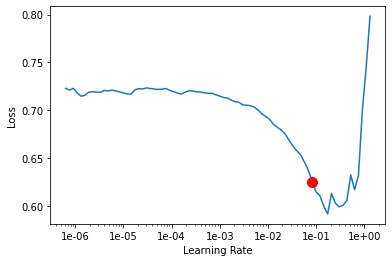

In [ ]:
learn_classifier.lr_find()
learn_classifier.recorder.plot(suggestion=True)

In [ ]:
learn_classifier.fit_one_cycle(5, max_lr=1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.513656,0.310742,0.929577,00:09
1,0.325803,0.259621,0.929577,00:09
2,0.270298,0.274128,0.929577,00:10
3,0.252641,0.271177,0.929577,00:10
4,0.268544,0.310872,0.929577,00:10


In [ ]:
learn_classifier.fit_one_cycle(5, max_lr=1e-3, moms=(0.8))

epoch,train_loss,valid_loss,accuracy,time
0,0.249263,0.253567,0.929577,00:09
1,0.259781,0.255367,0.929577,00:08
2,0.242746,0.254979,0.929577,00:09
3,0.242959,0.255341,0.929577,00:09
4,0.249419,0.255894,0.929577,00:08


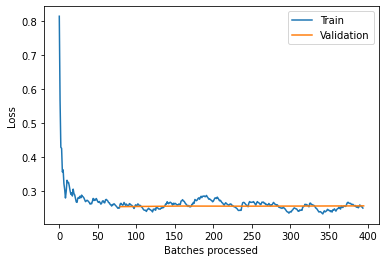

In [ ]:
learn_classifier.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.74E-06


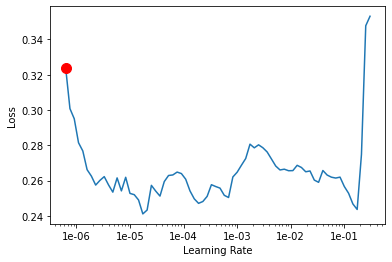

In [ ]:
lang_mod.freeze_to(-1)

learn_classifier.lr_find()
learn_classifier.recorder.plot(suggestion=True)

In [ ]:
learn_classifier.predict("I love my mower")

(Category tensor(0), tensor(0), tensor([0.9445, 0.0555]))

In [ ]:
learn_classifier.predict('My battery stopped working')

(Category tensor(0), tensor(0), tensor([0.9338, 0.0662]))

In [ ]:
valid_preds, valid_label=learn_classifier.get_preds(ds_type=DatasetType.Valid, ordered=True)
valid_preds.shape

torch.Size([426, 2])

In [ ]:
preds=valid_preds.numpy()
print(np.mean(preds[:,0]))
print(np.mean(preds[:,1]))

0.9488142
0.05118575


In [ ]:
val_target=preds[:,1]>0.05

In [ ]:
df_val_pred=pd.DataFrame({'text':df_val.Review, 'target':df_val.Annontation, 'Pred_Failure':val_target, 'Failure_score':preds[:,1]})

In [ ]:
pd.crosstab(df_val_pred.target, df_val_pred.Pred_Failure)

Pred_Failure,False,True
target,,
0,179,217
1,3,27


In [ ]:
df_val_pred.sort_values(['target','Pred_Failure'])

,text,target,Pred_Failure,Failure_score
7289,Love it.,0,False,0.041136
6961,Performance and battery length are great,0,False,0.048160
5296,Lightweight And powerful. Much better than gas...,0,False,0.048823
7663,I love it. My 11yo son loves it also. Two batt...,0,False,0.047092
7417,Best mower ever. So quiet. Cuts well. Plenty o...,0,False,0.045972
...,...,...,...,...
3784,Lawnmower works great the larger of the tow ba...,1,True,0.051773
3890,***see update below***The mower is great. It ...,1,True,0.054139
3723,My honest testimony and experience with WORX!W...,1,True,0.069266
3749,I wanted to like it so much but unfortunately ...,1,True,0.050651


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

lr_probs = df_val_pred.Failure_score

# calculate scores
lr_auc = roc_auc_score(df_val_pred.target, lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(df_val_pred.target, lr_probs)

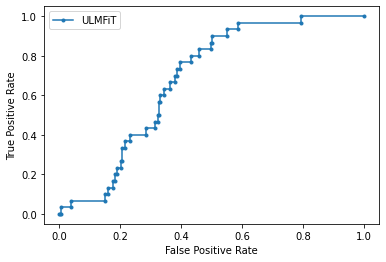

0.680892255892256

In [ ]:
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ULMFiT')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
lr_auc